<a href="https://colab.research.google.com/github/louzeiro/desafios/blob/main/Mutual_AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


data_url = 'https://raw.githubusercontent.com/louzeiro/desafios/main/empresas_v2.csv'
data = pd.read_csv(data_url)
data.head()

,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
0,SP,3313901,472052,2,16,4,CABL951
1,AM,4221902,605359,3,7,3,CABL951
2,DF,3321000,711994,0,13,2,MEL789
3,AC,4221903,25330,0,5,1,FOO456
4,GO,3321000,271513,0,3,2,MEL789


# Explorando os dados

### Estatísticas Básicas

Avaliação prévia dos dados numéricos presentes na base de dados. Onde observa-se que no mínimo as empresas possuem R\$ 10.064,00 e no máximo R\$ 999.963,00 de capital. Além de que, 50% dos registros não apresentam processos judiciais. Em média as empresas tem um pouco mais de 10 anos no mercado.

In [ ]:
data.describe()

,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa
count,11331.000000,11331.000000,11331.000000,11331.000000
mean,508196.307916,0.982614,10.981114,2.495896
std,285426.106524,1.416196,6.124697,1.118194
min,10064.000000,0.000000,1.000000,1.000000
25%,262608.500000,0.000000,6.000000,1.000000
50%,510616.000000,0.000000,11.000000,2.000000
75%,756111.000000,2.000000,16.000000,3.000000
max,999963.000000,4.000000,21.000000,4.000000


### Capital da empresas
Verificando a distribuição dos dados, observa-se que, visualmente, os dados apresentam um comportamento uniforme. Pelo boxplot é possível verificar que não há evidências da presença de outliers no conjunto de dados. 

Text(0.5, 1.0, 'Capital empresa')

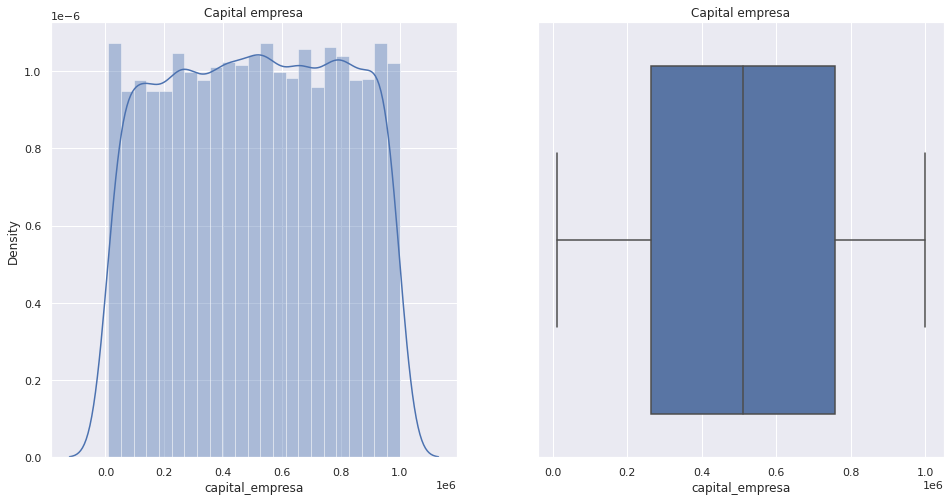

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(data['capital_empresa']).set_title('Capital empresa')
plt.subplot(1,2,2)
sns.boxplot(data['capital_empresa']).set_title('Capital empresa')

### Processos judiciais empresa

Da mesma forma, avaliando a distribuição dos dados e a possibilidade de outliers. Observa-se que a maioria ddos registros não possuem ocorrência de processos judiciais

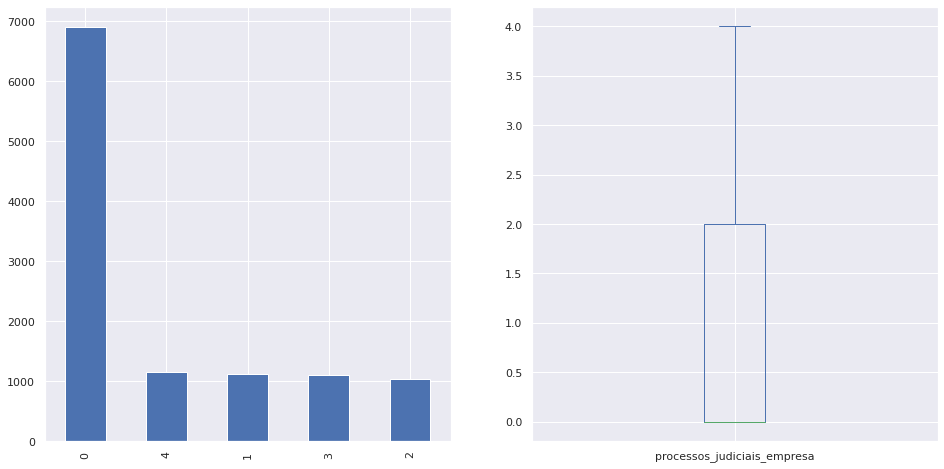

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
data.processos_judiciais_empresa.value_counts().plot.bar()
plt.subplot(1,2,2)
data.processos_judiciais_empresa.plot.box()

### Idade empresa

Visualizando a distribuição das idades registradas na base de dados. Observa-se que há vasta variedade, com registro de  1 a 20 anos. Sendo 20 a idade mais frequente e 12 a menos frequente

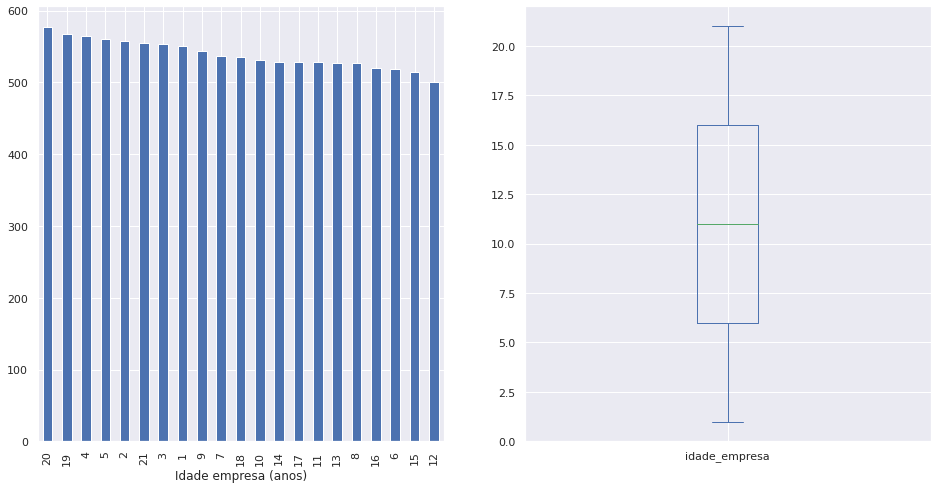

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
data.idade_empresa.value_counts().plot.bar().set_xlabel('Idade empresa (anos)')
plt.subplot(1,2,2)
data.idade_empresa.plot.box()

### Número do sócios

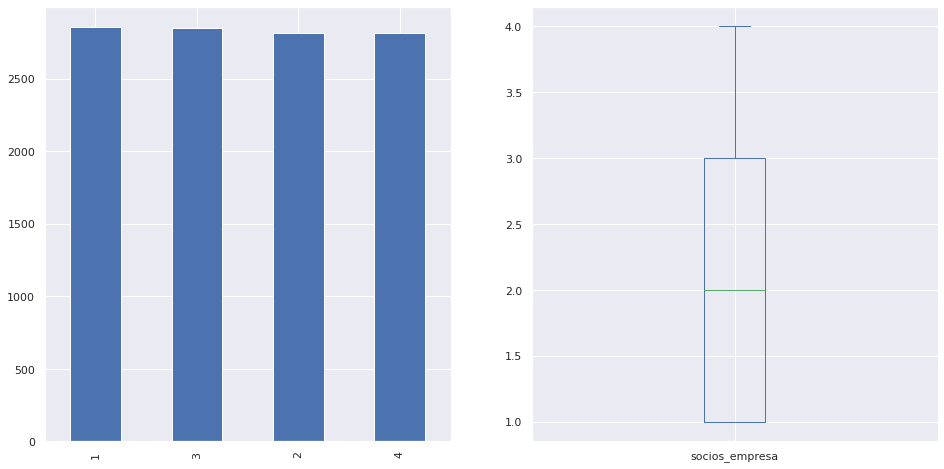

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
data.socios_empresa.value_counts().plot.bar()
plt.subplot(1,2,2)
data.socios_empresa.plot.box()

## Variáveis Categóricas

Lista de fornecedores

In [8]:
data.fornecedor_empresa.unique()

array(['CABL951', 'MEL789', 'FOO456', 'XPTO123', 'JJF753'], dtype=object)

Total de registros dos fornecedores no conjunto de dados

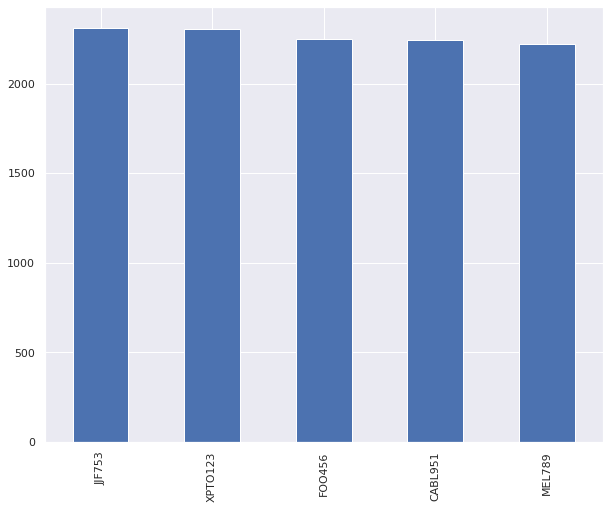

In [18]:
plt.figure(figsize=(10,8))
data.fornecedor_empresa.value_counts().plot.bar()

Estados

Total de ocorrência de cada estado

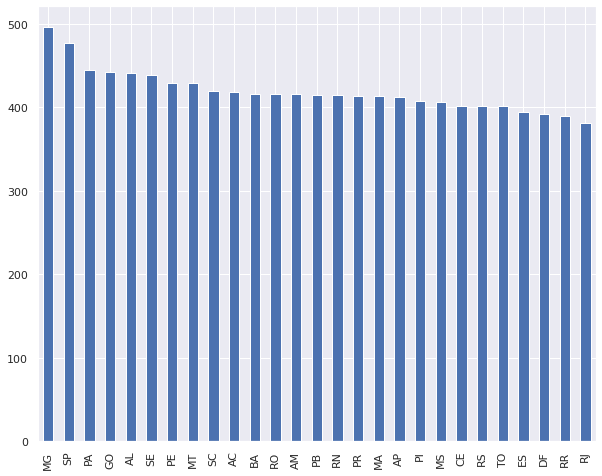

In [21]:
plt.figure(figsize=(10,8))
data.estado_empresa.value_counts().plot.bar()

# insight

Exemplo feito para o estado de SP. Porém, facilmente alterado para mais estados alterando a variável ***quantidade_estados***

In [139]:
##################################
quantidade_estados = 3
#################################

In [140]:
estados = data.estado_empresa.unique()
estados = estados[:quantidade_estados]
fornecedores = data.fornecedor_empresa.unique()

## Visualizando a quantidade de ocorrência dos fornecedores por estado 

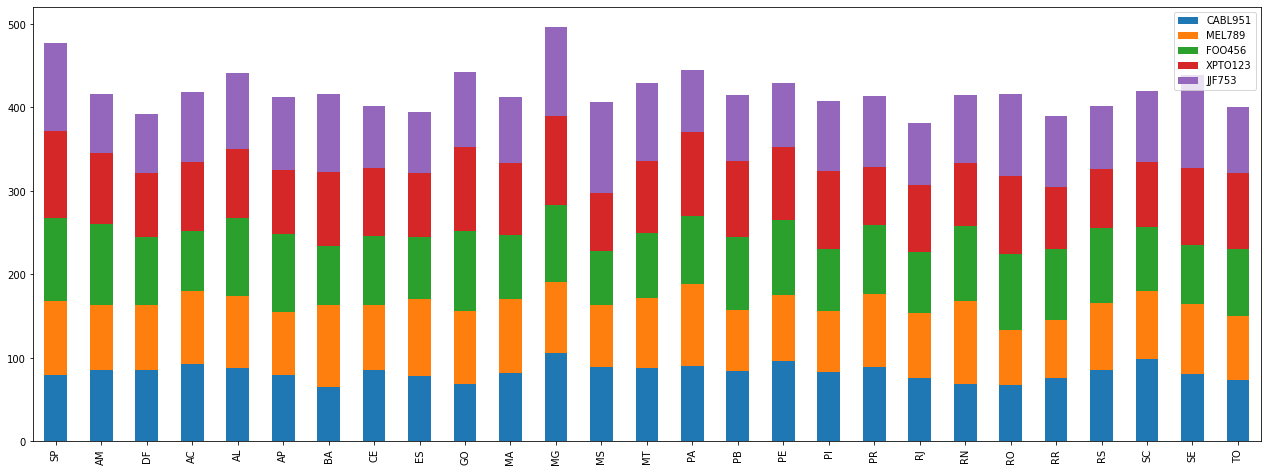

In [141]:
df = pd.DataFrame(index=estados)

for fornecedor in list(fornecedores):
  aux = data[data['fornecedor_empresa']==fornecedor]
  aux2 = pd.DataFrame(aux.groupby('estado_empresa').size(),
                      columns=[fornecedor])
  df =  pd.concat([df,aux2],axis=1)

df.plot.bar(stacked=True, figsize=(22,8))

## Verificando as distribuições dos registro de capital aplicado e as distribuições dos processos judiciais no estado para cada fornecedor

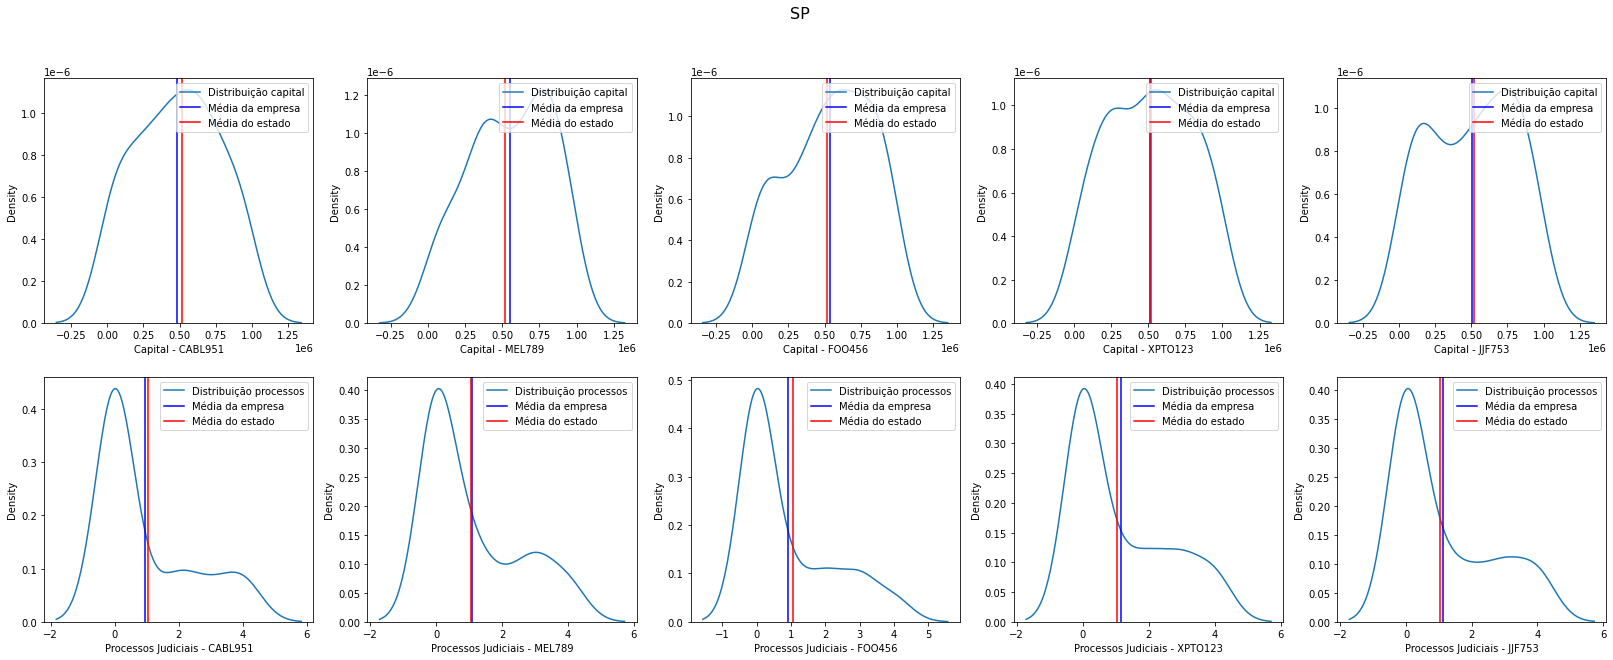

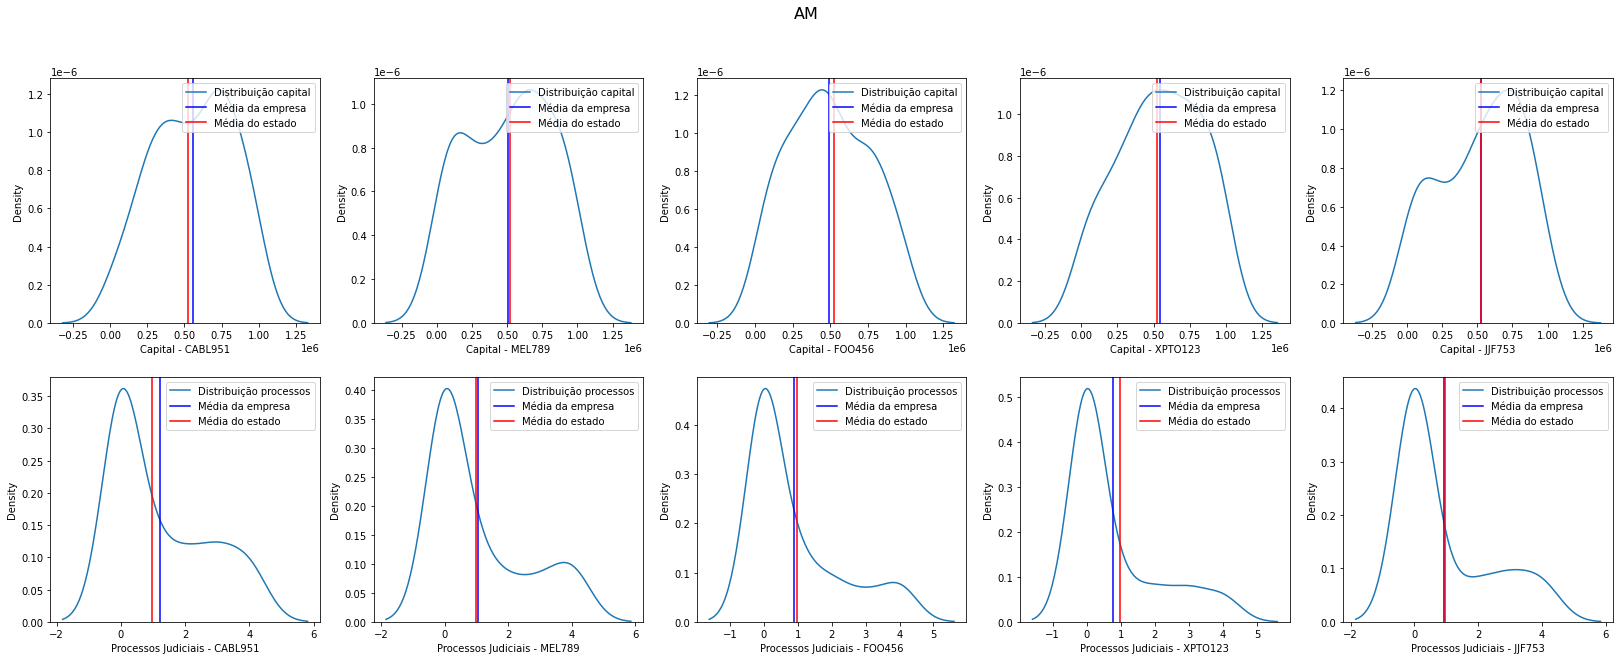

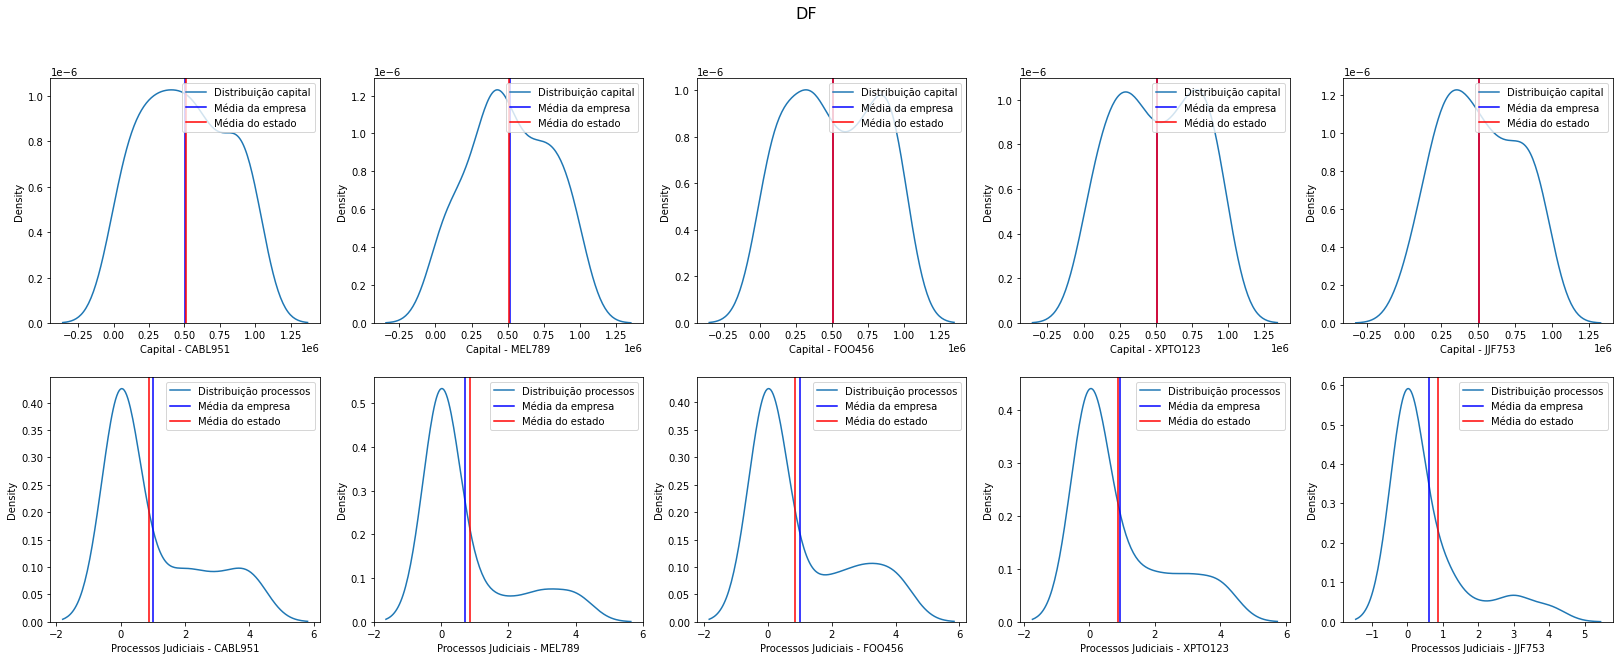

In [142]:
for estado in estados:
  df = data.loc[data.estado_empresa==estado]
  plt.figure(figsize=(28,10))
  plt.subplots_adjust(hspace=0.22)
  plt.suptitle(estado, fontsize=16)

  for idx, fornecedor in enumerate(fornecedores):  
    plt.subplot(2,5,idx+1)
    sns.distplot(df.loc[df.fornecedor_empresa==fornecedor].capital_empresa, hist=False)
    plt.axvline(df.loc[data.fornecedor_empresa==fornecedor].capital_empresa.mean(), color='b')
    plt.axvline(df.capital_empresa.mean(), color='r')
    #plt.text(df.capital_empresa.mean(),0,'Média estadual', color='k', rotation=90)
    plt.xlabel('Capital - '+fornecedor)
    plt.legend(["Distribuição capital","Média da empresa", "Média do estado"], loc='upper right')
    
    plt.subplot(2,5,5+idx+1)
    sns.distplot(df.loc[df.fornecedor_empresa==fornecedor].processos_judiciais_empresa, hist=False)
    plt.axvline(df.loc[df.fornecedor_empresa==fornecedor].processos_judiciais_empresa.mean(), color='b')
    plt.axvline(df.processos_judiciais_empresa.mean(), color='r')
    #plt.text(df.processos_judiciais_empresa.mean(),0,'Média estadual',rotation=90)
    plt.xlabel('Processos Judiciais - '+fornecedor)
    plt.legend(["Distribuição processos","Média da empresa", "Média do estado"], loc='upper right')
    


## 3D - Estado

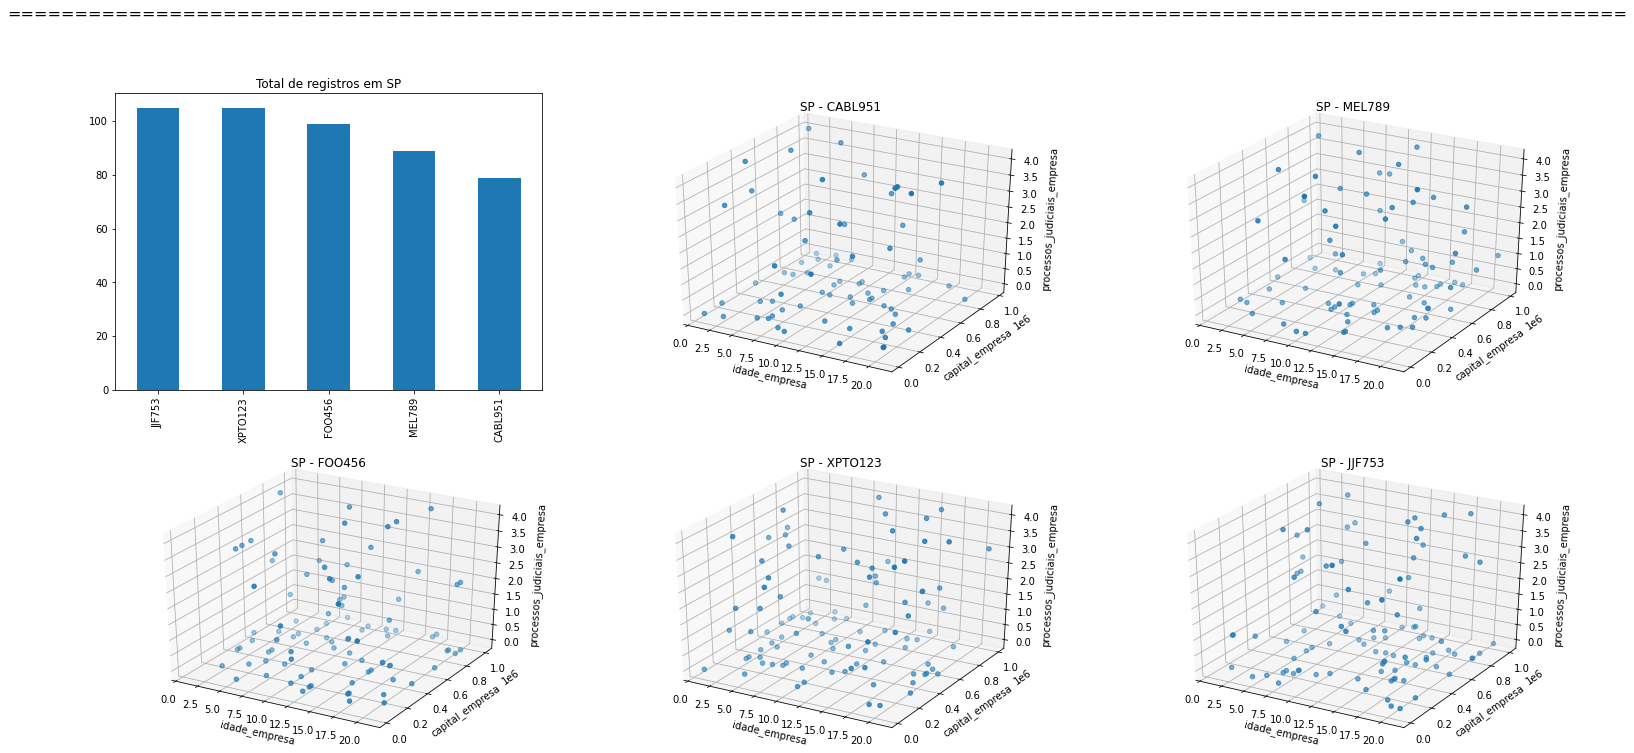

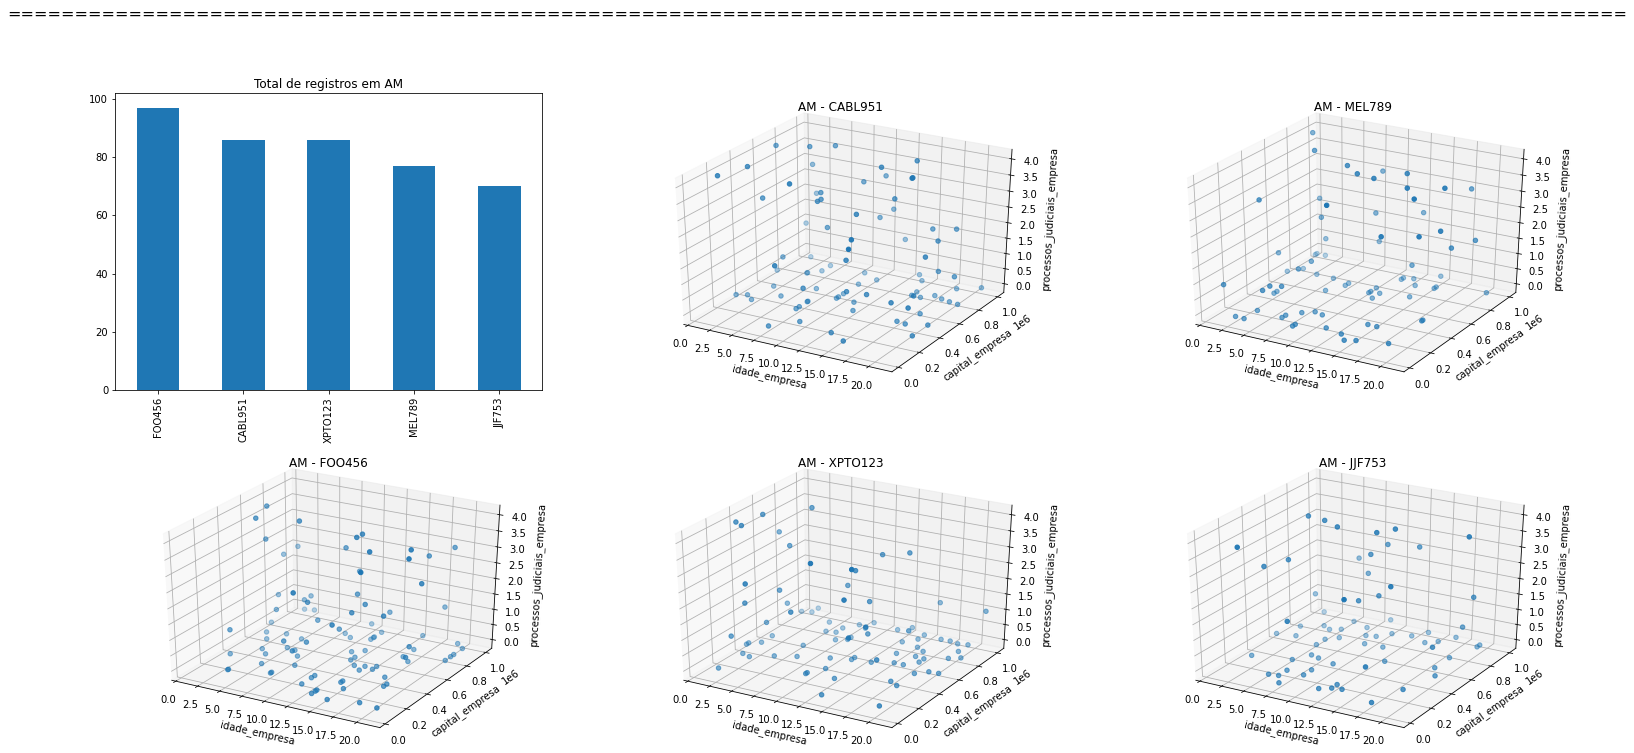

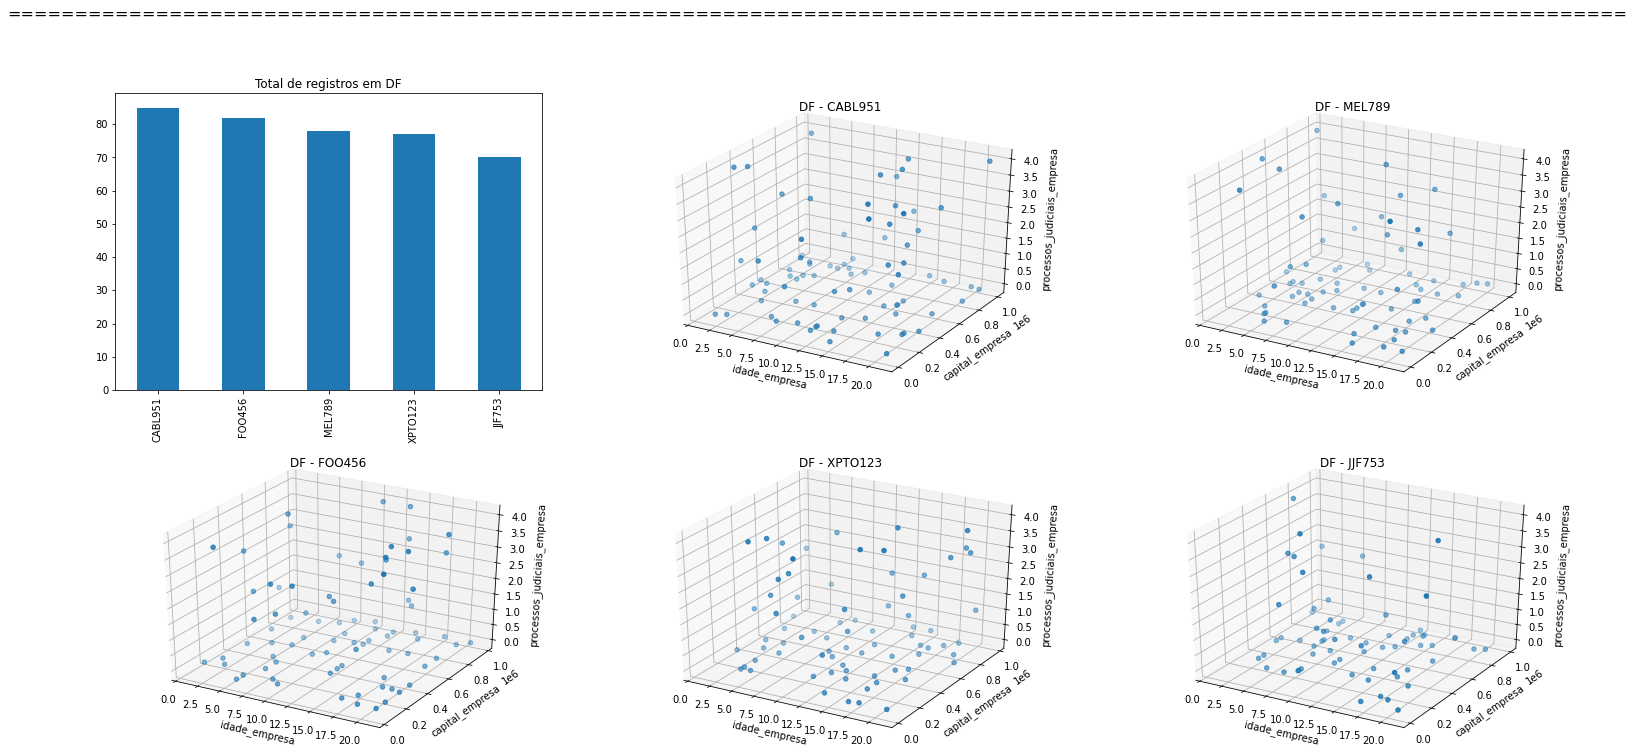

In [143]:
for estado in estados:
  df = data.loc[data.estado_empresa==estado]
  fig = plt.figure(figsize=(26,12))
  plt.suptitle(120*'=', fontsize=16)
  img = fig.add_subplot(2,3,1)
  df.fornecedor_empresa.value_counts().plot.bar()
  img.set_title('Total de registros em ' + estado)
  
  for idx, fornecedor in enumerate(fornecedores):
    df2 = df.loc[data.fornecedor_empresa==fornecedor]
    eixo = fig.add_subplot(2,3,idx+2, projection='3d')
    eixo.scatter(df2.idade_empresa,
                df2.capital_empresa,
                df2.processos_judiciais_empresa
                )

    eixo.set_xlabel('idade_empresa')
    eixo.set_ylabel('capital_empresa')
    eixo.set_zlabel('processos_judiciais_empresa')
    eixo.set_title(estado+' - '+fornecedor)

## Total de registros de cada fornecedor por estado

In [147]:
import numpy as np
import matplotlib.patches as mpatches

def waffle_plot(df3,value_str,estado):
  width = 40
  height=10
  categories_str = 'fornecedor_empresa'
  total = sum(df3[value_str])
  proportions = [(float(value) / total) for value in df3[value_str]]
  total= width * height
  tiles_per_category = [round(proportion * total) for proportion in proportions] 
  waffle = np.zeros((height, width))
  category_index = 0
  tile_index = 0 
  for col in range(width):
      for row in range(height):
          tile_index += 1
          if tile_index > sum(tiles_per_category[0:category_index]):
              category_index += 1
          waffle[row, col] = category_index

  fig = plt.figure()
  colormap = plt.cm.coolwarm
  plt.matshow(waffle, cmap=colormap)
  ax = plt.gca()
  ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
  ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
  ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
  plt.xticks([])
  plt.yticks([])
  values = df3[value_str]
  categories = df3[categories_str]
  value_sign = ''
  values_cumsum = np.cumsum(values)
  total_values = values_cumsum[len(values_cumsum) - 1]
  legend_handles = []

  for i, category in enumerate(categories):
      if value_sign == '%':
          label_str = category + ' (' + str(values[i]) + value_sign + ')' 
      else:
          label_str = category + ' (' + value_sign + str(values[i]) + ')'
      color_val = colormap(float(values_cumsum[i]) / total_values)
      legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

  plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories), bbox_to_anchor=(0., 0.2, 0.95, 0.1))
  plt.title(value_str+' em '+estado)
  plt.show()


<Figure size 1584x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

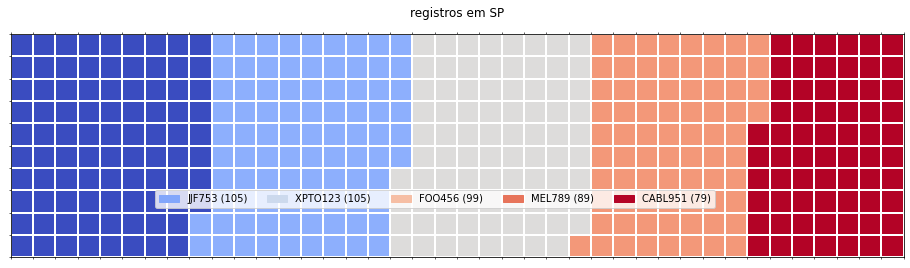

<Figure size 1584x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

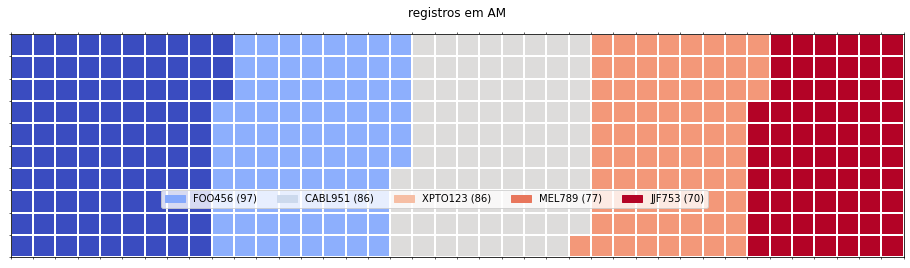

<Figure size 1584x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

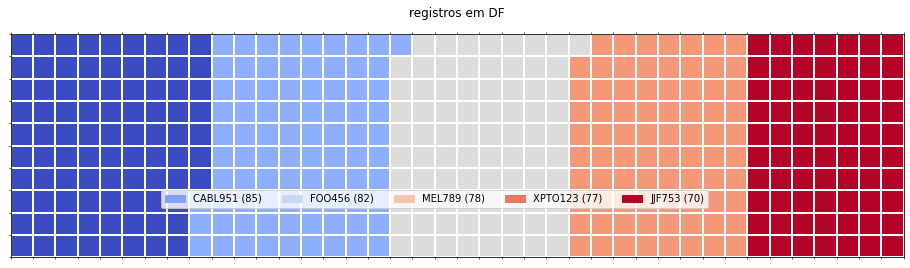

In [149]:
for estado in estados:
  df = data.loc[data.estado_empresa==estado]
  df3 = pd.DataFrame(df.fornecedor_empresa.value_counts()).reset_index().rename(columns={"index":"fornecedor_empresa", "fornecedor_empresa":"registros"})
  value_str = 'registros'
  plt.figure(figsize=(22,10))
  img = fig.add_subplot(2,1,1)  
  waffle_plot(df3,value_str, estado)